In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python Codes/Global company/filtered_file.csv')
df.head()

,name,domain,year founded,industry,locality,country,linkedin url,current employee estimate,total employee estimate
0,ibm,ibm.com,1911.0,information technology and services,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,tata consultancy services,tcs.com,1968.0,information technology and services,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,accenture,accenture.com,1989.0,information technology and services,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,us army,goarmy.com,1800.0,military,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,ey,ey.com,1989.0,accounting,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960




1.   Show the total number of companies listed
2.   Show the total number of countries listed
3. Show the total number of industry listed
Just below these three stats - 
 Show the graph of top 20 companies as per the current employee estimate


1.  Give a dropdown on company names, country, industry, and year.
2.  Show tables on the above fields and change them as per the selection.



In [4]:
df['year founded'] = df['year founded'].astype('int64')

# Statistical data

**Number of companies founded in last 30 years**

In [5]:
year_data = df.groupby('year founded', as_index = False)['name'].count()

In [6]:
year_data = year_data.sort_values(by = 'year founded', ascending = False)[:30]
year_data['count of companies'] = year_data['name']
year_data.drop(columns = ['name'], axis = 1, inplace = True)

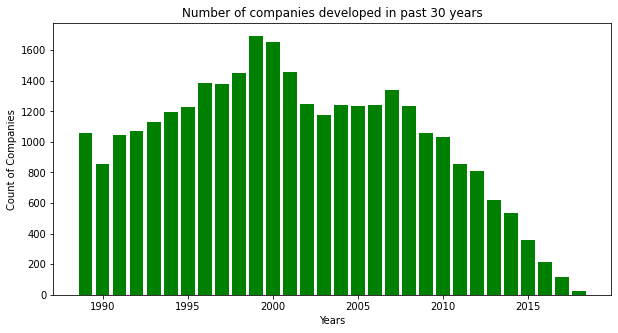

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.bar(year_data['year founded'], year_data['count of companies'], color ='green', width = 0.8)
plt.xlabel("Years")
plt.ylabel("Count of Companies")
plt.title('Number of companies developed in past 30 years')


plt.show()

In [8]:
import plotly.express as px

In [9]:
country = df['country'].value_counts().rename_axis('country').reset_index(name='count')

**Top 20 countries as per the number of companies in it**

In [10]:
px.bar(country.nlargest(20, 'count').sort_values(by='count'), x='count', y='country', color = 'country', title='Top 20 Countries as per number of companies')

**Top 20 industries as per the number of companies in it**

In [11]:
industry = df['industry'].value_counts().rename_axis('industry').reset_index(name='count')

In [12]:
px.bar(industry.nlargest(20, 'count').sort_values(by='count'), x='count', y='industry', color = 'industry', title='Top 20 Industries as per number of companies')

**Top 20 companies as per the current employee estimate**

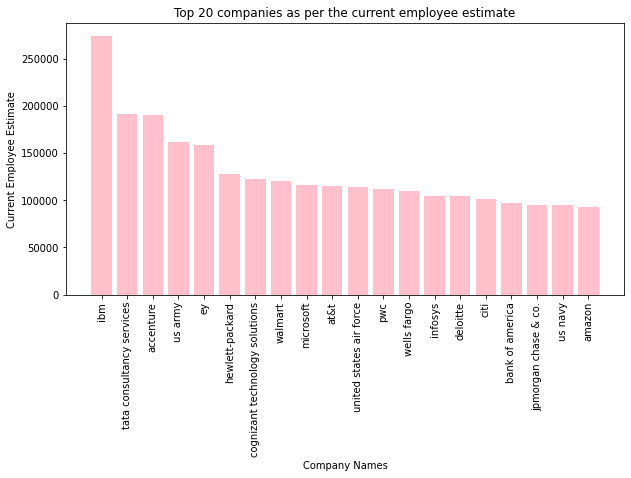

In [13]:
cm_data = df[:20]

fig = plt.figure(figsize = (10, 5))
plt.bar(cm_data['name'], cm_data['current employee estimate'], color ='pink', width = 0.8)
plt.xlabel("Company Names")
plt.ylabel("Current Employee Estimate")
plt.title('Top 20 companies as per the current employee estimate')
plt.xticks(rotation = 90)

plt.show()

In [14]:
len(df['name'].unique())

86800

In [15]:
len(df['country'].unique())

192

In [18]:
df['name'].unique().shape 

(86800,)

In [20]:
name = df['name'].unique().shape[0]
domain = df['domain']
year = df['year founded']
industry = df['industry']
country = df['country']
employees = df['current employee estimate']
url = df['linkedin url']

In [22]:
def data_over_time(df,col):

    nations_over_time = df['name'].value_counts().rename_axis('industry').reset_index(name='count')
    nations_over_time.rename(columns={'index': 'name', 'Year': col}, inplace=True)
    return nations_over_time

In [23]:
data_over_time(df,'name')

,name,year founded
0,0,18357
221,1451,1
220,1789,1
219,1800,1
213,1801,7
...,...,...
47,2014,532
60,2015,361
75,2016,212
128,2017,115


In [24]:
years = df['year founded'].unique().tolist()
years.sort()

In [26]:
years.insert(0, 'Overall')

In [33]:
years.remove(0)

In [27]:
industry = df['industry'].unique().tolist()
industry.sort()
industry.insert(0, 'Overall')

In [28]:
country = df['country'].unique().tolist()
country.sort()
country.insert(0, 'Overall')

In [43]:
new_df = pd.DataFrame(
        {
            'name':df['name'],
            'year':df['year founded'],
            'industry':df['industry'],
            'country':df['country']
        }
    )

In [57]:
def apply_filter(year, industry, country):
  new_df = pd.DataFrame(
        {
            'name':df['name'],
            'year':df['year founded'],
            'industry':df['industry'],
            'country':df['country']
        }
    )
  
  if year == 'Overall' and industry == 'Overall' and country == 'Overall':
    temp = new_df

  if year == 'Overall' and industry != 'Overall' and country != 'Overall':
    temp = new_df[(new_df['industry'] == industry) & (new_df['country']==country)]

  if industry == 'Overall' and year != 'Overall' and country != 'Overall':
    temp = new_df[(new_df['year'] == year) & (new_df['country']==country)]

  if country == 'Overall' and industry != 'Overall' and year != 'Overall':
    temp = new_df[(new_df['year'] == year) & (new_df['industry']==industry)]

  if year == 'Overall' and industry == 'Overall' and country != 'Overall':
    temp = new_df[new_df['country']==country]

  if year == 'Overall' and country == 'Overall' and industry != 'Overall':
    temp = new_df[new_df['industry']==industry]

  if year != 'Overall' and industry == 'Overall' and country == 'Overall':
    temp = new_df[new_df['year']==year]

  if year != 'Overall' and industry != 'Overall' and country != 'Overall':
    temp = new_df[(new_df['industry'] == industry) & (new_df['country']==country) & (new_df['year']==year)]

  print(temp)


In [61]:
df['year founded'].astype('int')

0        1911
1        1968
2        1989
3        1800
4        1989
         ... 
86795       0
86796    2002
86797    1923
86798    1899
86799    1951
Name: year founded, Length: 86800, dtype: int64

Number of companies developed over the years

In [72]:
year_company = df[df['year founded'] != 0]['year founded'].value_counts().rename_axis('Year').reset_index(name = 'count').sort_values('Year')

In [74]:
fig = px.line(year_company, x = 'Year', y = 'count')
fig.show()

In [79]:
year_df = df[['year founded', 'industry', 'name']]
year_df

,year founded,industry,name
0,1911,information technology and services,ibm
1,1968,information technology and services,tata consultancy services
2,1989,information technology and services,accenture
3,1800,military,us army
4,1989,accounting,ey
...,...,...,...
86795,0,automotive,isri
86796,2002,marketing and advertising,law & kenneth saatchi & saatchi pvt ltd.
86797,1923,information technology and services,madis
86798,1899,hospital & health care,king's daughters' health


In [80]:
year_df = year_df[year_df['year founded'] != 0]

In [93]:
year_df.groupby(['year founded'])[['industry']].count()

,name
year founded,
1451,1
1789,1
1800,1
1801,7
1802,5
...,...
2014,532
2015,361
2016,212


In [89]:
year_industry = year_df.groupby('year founded')[['industry']].count().reset_index().sort_values('year founded')
year_industry.rename(columns = {'year founded':'Year', 'industry':'Count of industry'}, inplace = True)
year_industry 

,Year,Count of industry
0,1451,1
1,1789,1
2,1800,1
3,1801,7
4,1802,5
...,...,...
216,2014,532
217,2015,361
218,2016,212
219,2017,115


In [90]:
fig = px.line(year_industry, x='Year', y='Count of industry')
fig.show()

In [ ]:
year_company = df[df['year founded'] != 0]['year founded'].value_counts().rename_axis('Year').reset_index(name = 'count').sort_values('Year')